In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [4]:
data = pd.read_csv('Walmart.csv')
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,5/10/2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12/10/2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


## QUESTION 1.  Which store has maximum sales

In [5]:
data[data['Weekly_Sales']== data['Weekly_Sales'].max()]['Store']

1905    14
Name: Store, dtype: int64

#### Answer 1: Store 14 has the maximum sale

## QUESTION 2.	Which store has maximum standard deviation 

In [7]:
std_list_ser = data['Weekly_Sales'].groupby(data['Store']).std()
std_list_ser

Store
1     155980.767761
2     237683.694682
3      46319.631557
4     266201.442297
5      37737.965745
6     212525.855862
7     112585.469220
8     106280.829881
9      69028.666585
10    302262.062504
11    165833.887863
12    139166.871880
13    265506.995776
14    317569.949476
15    120538.652043
16     85769.680133
17    112162.936087
18    176641.510839
19    191722.638730
20    275900.562742
21    128752.812853
22    161251.350631
23    249788.038068
24    167745.677567
25    112976.788600
26    110431.288141
27    239930.135688
28    181758.967539
29     99120.136596
30     22809.665590
31    125855.942933
32    138017.252087
33     24132.927322
34    104630.164676
35    211243.457791
36     60725.173579
37     21837.461190
38     42768.169450
39    217466.454833
40    119002.112858
41    187907.162766
42     50262.925530
43     40598.413260
44     24762.832015
45    130168.526635
Name: Weekly_Sales, dtype: float64

In [8]:
std_list_data = pd.DataFrame(std_list_ser).sort_values(by='Weekly_Sales', ascending = False)


In [9]:
std_list_desc = std_list_data
std_list_desc

,Weekly_Sales
Store,
14,317569.949476
10,302262.062504
20,275900.562742
4,266201.442297
13,265506.995776
23,249788.038068
27,239930.135688
2,237683.694682
39,217466.454833


In [10]:
std_list_desc.reset_index(inplace= True)

In [11]:
std_list_desc.iloc[0]



Store               14.000000
Weekly_Sales    317569.949476
Name: 0, dtype: float64

####  Answer 2: Store 14 has the maximum standard deviation

## QUESTION 3•	Which store/s has good quarterly growth rate in Q3’2012

In [12]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,5/10/2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12/10/2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [13]:
type(data['Date'])

pandas.core.series.Series

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
Store           6435 non-null int64
Date            6435 non-null object
Weekly_Sales    6435 non-null float64
Holiday_Flag    6435 non-null int64
Temperature     6435 non-null float64
Fuel_Price      6435 non-null float64
CPI             6435 non-null float64
Unemployment    6435 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [15]:
data['Date'] = pd.to_datetime(data['Date'], format = '%d-%m-%Y')

ValueError: time data '5/2/2010' does not match format '%d-%m-%Y' (match)

In [16]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,5/10/2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12/10/2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [17]:
type(data['Date'])

pandas.core.series.Series

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
Store           6435 non-null int64
Date            6435 non-null object
Weekly_Sales    6435 non-null float64
Holiday_Flag    6435 non-null int64
Temperature     6435 non-null float64
Fuel_Price      6435 non-null float64
CPI             6435 non-null float64
Unemployment    6435 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [24]:
data['Date']= pd.to_datetime(data['Date'])

#### To extract the Weekday from the Date column

In [21]:
data['Date'][0]

'5/2/2010'

In [25]:
data['Date'][0].weekday()

6

In [26]:
def day_of_the_week (days):
    return days.weekday()
    

In [27]:
 all_days= data['Date'].apply(day_of_the_week)

In [28]:
all_days

0       6
1       3
2       4
3       4
4       0
       ..
6430    4
6431    3
6432    0
6433    4
6434    4
Name: Date, Length: 6435, dtype: int64

In [30]:
data['Weekdays']= all_days

In [31]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekdays
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,6
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,4
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,3
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,0
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4


#### To extract the Month Number from the Date column

In [1810]:
data['Date'][0].month

2

In [1811]:
months = []
months

[]

In [1812]:
data.shape

(6435, 9)

In [1]:
for i in range (data.shape[0]):
    months.append (data['Date'][i].month)

NameError: name 'data' is not defined

In [1814]:
months

[2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 11,
 11,
 11,


In [1815]:
data['Exact_month'] = months
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekdays,Exact_month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,4,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,4,3
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,4,9
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,4,10
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,4,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,10


### To extract the Month Name

In [1816]:
Month_name = data['Date'].dt.month_name()
Month_name

0        February
1        February
2        February
3        February
4           March
          ...    
6430    September
6431      October
6432      October
6433      October
6434      October
Name: Date, Length: 6435, dtype: object

In [1817]:
data['Month_name'] = Month_name
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekdays,Exact_month,Month_name
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,February
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,February
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,February
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,February
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,March
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,4,9,September
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,4,10,October
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,4,10,October
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,10,October


#### To extract the year from the Date column

In [1818]:
data['Date'][0]

Timestamp('2010-02-05 00:00:00')

In [1819]:
data['Date'][0].year

2010

In [1820]:
def all_years (yearly):
    return yearly.year

In [1821]:
the_year = data['Date'].apply(all_years)

In [1822]:
the_year

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
6430    2012
6431    2012
6432    2012
6433    2012
6434    2012
Name: Date, Length: 6435, dtype: int64

In [1823]:
data['Year'] = the_year

In [1824]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekdays,Exact_month,Month_name,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,February,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,February,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,February,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,February,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,March,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,4,9,September,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,4,10,October,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,4,10,October,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,10,October,2012


In [1825]:
(data['Exact_month'] > 6) & (data ['Exact_month'] < 10) & (data['Year'] == 2012)

0       False
1       False
2       False
3       False
4       False
        ...  
6430     True
6431    False
6432    False
6433    False
6434    False
Length: 6435, dtype: bool

In [1826]:
Third_Quarter = data[(data['Exact_month'] > 6) & (data ['Exact_month'] < 10) & (data['Year'] == 2012)]

In [1827]:
Third_Quarter

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekdays,Exact_month,Month_name,Year
126,1,2012-07-06,1769854.16,0,81.57,3.227,221.883779,6.908,4,7,July,2012
127,1,2012-07-13,1527014.04,0,77.12,3.256,221.924158,6.908,4,7,July,2012
128,1,2012-07-20,1497954.76,0,80.42,3.311,221.932727,6.908,4,7,July,2012
129,1,2012-07-27,1439123.71,0,82.66,3.407,221.941295,6.908,4,7,July,2012
130,1,2012-08-03,1631135.79,0,86.11,3.417,221.949864,6.908,4,8,August,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
6426,45,2012-08-31,734297.87,0,75.09,3.867,191.461281,8.684,4,8,August,2012
6427,45,2012-09-07,766512.66,1,75.70,3.911,191.577676,8.684,4,9,September,2012
6428,45,2012-09-14,702238.27,0,67.87,3.948,191.699850,8.684,4,9,September,2012
6429,45,2012-09-21,723086.20,0,65.32,4.038,191.856704,8.684,4,9,September,2012


In [1828]:
Third_Quarter_Grouped = Third_Quarter.groupby('Store')


In [1829]:
Third_Quarter_Grouped

In [1830]:
Quarter_mean_sales = (Third_Quarter_Grouped['Weekly_Sales'].agg(np.mean))

In [1831]:
Quarter_mean_sales = np.round(Quarter_mean_sales, 0)
Quarter_mean_sales

Store
1     1557996.0
2     1869489.0
3      407539.0
4     2138215.0
5      320292.0
6     1551332.0
7      635599.0
8      903766.0
9      540165.0
10    1772097.0
11    1347391.0
12     964333.0
13    2032405.0
14    1629812.0
15     585545.0
16     547811.0
17     958419.0
18    1037674.0
19    1400273.0
20    2068579.0
21     694431.0
22     988088.0
23    1433961.0
24    1382798.0
25     700699.0
26    1051976.0
27    1715978.0
28    1236977.0
29     513172.0
30     430362.0
31    1369747.0
32    1184348.0
33     264125.0
34     960461.0
35     870955.0
36     294746.0
37     517544.0
38     431191.0
39    1593470.0
40     990246.0
41    1391834.0
42     561289.0
43     615429.0
44     339327.0
45     737021.0
Name: Weekly_Sales, dtype: float64

In [1832]:
Quarter_mean_sales = pd.DataFrame(Quarter_mean_sales).sort_values('Weekly_Sales', ascending= False)
Quarter_mean_sales

,Weekly_Sales
Store,
4,2138215.0
20,2068579.0
13,2032405.0
2,1869489.0
10,1772097.0
27,1715978.0
14,1629812.0
39,1593470.0
1,1557996.0


In [1833]:
Quarter_mean_sales.reset_index()

,Store,Weekly_Sales
0,4,2138215.0
1,20,2068579.0
2,13,2032405.0
3,2,1869489.0
4,10,1772097.0
5,27,1715978.0
6,14,1629812.0
7,39,1593470.0
8,1,1557996.0
9,6,1551332.0


#### Answer  3: The top 5 stores with the highest quarterly growth rate in Q3’2012 are store 4, store 20, store 13 , store 2, store 10 respectively in decreasing order.

##  Question 4•	Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

In [1834]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekdays,Exact_month,Month_name,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,February,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,February,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,February,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,February,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,March,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,4,9,September,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,4,10,October,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,4,10,October,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,10,October,2012


In [1835]:
data['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [1836]:
Holiday_period = data[data['Holiday_Flag'] == 1]
Holiday_period

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekdays,Exact_month,Month_name,Year
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,February,2010
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787,4,9,September,2010
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,4,11,November,2010
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,4,12,December,2010
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742,4,2,February,2011
...,...,...,...,...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625,4,9,September,2011
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523,4,11,November,2011
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523,4,12,December,2011
6397,45,2012-02-10,803657.12,1,37.00,3.640,189.707605,8.424,4,2,February,2012


In [1837]:
Non_holiday = data[data['Holiday_Flag'] == 0]
Non_holiday

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekdays,Exact_month,Month_name,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,February,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,February,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,February,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,March,2010
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,4,3,March,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,4,9,September,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,4,10,October,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,4,10,October,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,10,October,2012


In [1838]:
Hol_by_month = Holiday_period.groupby('Month_name')['Weekly_Sales'].mean()
Hol_by_month

Month_name
December     9.608331e+05
February     1.079128e+06
November     1.471273e+06
September    1.042427e+06
Name: Weekly_Sales, dtype: float64

In [1839]:
Non_holiday

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekdays,Exact_month,Month_name,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,February,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,February,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,February,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,March,2010
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,4,3,March,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,4,9,September,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,4,10,October,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,4,10,October,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,10,October,2012


In [1840]:
Non_hol_by_month = Non_holiday['Weekly_Sales'].mean()
Non_hol_by_month

1041256.3802088564

In [1841]:
Hol_by_month > Non_hol_by_month

Month_name
December     False
February      True
November      True
September     True
Name: Weekly_Sales, dtype: bool

In [1842]:
Hol_with_higher_sales = np.round(Hol_by_month[(Hol_by_month) > (Non_hol_by_month)], 0)
Hol_with_higher_sales

Month_name
February     1079128.0
November     1471273.0
September    1042427.0
Name: Weekly_Sales, dtype: float64

In [1843]:
Hol_with_higher_sales = pd.DataFrame(Hol_with_higher_sales)
Hol_with_higher_sales

,Weekly_Sales
Month_name,
February,1079128.0
November,1471273.0
September,1042427.0


In [1844]:
Hol_with_higher_sales.reset_index()

,Month_name,Weekly_Sales
0,February,1079128.0
1,November,1471273.0
2,September,1042427.0


#### Answer 4 : February (Super Bowl), September (Labour Day) and  November (Thanksgiving Day) all have sales that is higher than the mean of all sales in non-holiday season for all stores together

## Question 5• Provide a monthly and semester view of sales in units and give insights

In [1845]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekdays,Exact_month,Month_name,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,February,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,February,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,February,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,February,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,March,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,4,9,September,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,4,10,October,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,4,10,October,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,10,October,2012


In [1846]:
Monthly_view_of_sales = data[['Exact_month','Month_name','Weekly_Sales']]
Monthly_view_of_sales

,Exact_month,Month_name,Weekly_Sales
0,2,February,1643690.90
1,2,February,1641957.44
2,2,February,1611968.17
3,2,February,1409727.59
4,3,March,1554806.68
...,...,...,...
6430,9,September,713173.95
6431,10,October,733455.07
6432,10,October,734464.36
6433,10,October,718125.53


In [1847]:
Monthly_view_of_sales['Exact_month']

0        2
1        2
2        2
3        2
4        3
        ..
6430     9
6431    10
6432    10
6433    10
6434    10
Name: Exact_month, Length: 6435, dtype: int64

In [1848]:
Monthly_view_of_sales['Exact_month']

0        2
1        2
2        2
3        2
4        3
        ..
6430     9
6431    10
6432    10
6433    10
6434    10
Name: Exact_month, Length: 6435, dtype: int64

In [1849]:
Monthly_view_of_sales = np.round(Monthly_view_of_sales.groupby(['Exact_month','Month_name'])['Weekly_Sales'].sum(),0)
Monthly_view_of_sales

Exact_month  Month_name
1            January       332598438.0
2            February      568727890.0
3            March         592785901.0
4            April         646859785.0
5            May           557125572.0
6            June          622629887.0
7            July          650000977.0
8            August        613090209.0
9            September     578761179.0
10           October       584784788.0
11           November      413015725.0
12           December      576838635.0
Name: Weekly_Sales, dtype: float64

In [1850]:
Monthly_view_of_sales = pd.DataFrame(Monthly_view_of_sales)
Monthly_view_of_sales

,,Weekly_Sales
Exact_month,Month_name,
1,January,332598438.0
2,February,568727890.0
3,March,592785901.0
4,April,646859785.0
5,May,557125572.0
6,June,622629887.0
7,July,650000977.0
8,August,613090209.0
9,September,578761179.0


In [1851]:
Monthly_view_of_sales.reset_index(inplace=True)
Monthly_view_of_sales

,Exact_month,Month_name,Weekly_Sales
0,1,January,332598438.0
1,2,February,568727890.0
2,3,March,592785901.0
3,4,April,646859785.0
4,5,May,557125572.0
5,6,June,622629887.0
6,7,July,650000977.0
7,8,August,613090209.0
8,9,September,578761179.0
9,10,October,584784788.0


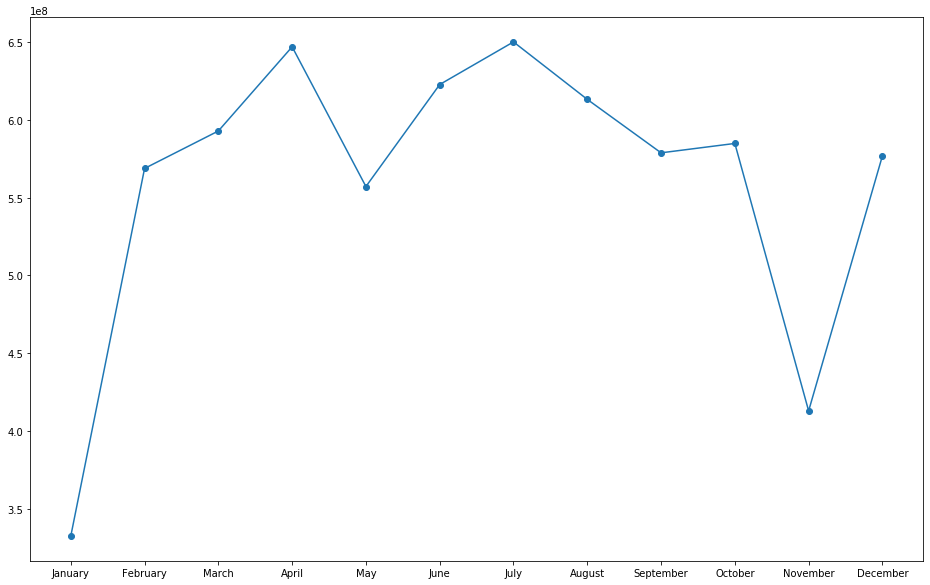

In [1852]:
plt.figure(figsize=[16,10])
plt.plot('Month_name','Weekly_Sales', data = Monthly_view_of_sales, marker='o')


#### Answer 5 : It can be seen from the graph above that the greatest increase in sell was from January to february. 
#### This is followed by November to December

In [1853]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekdays,Exact_month,Month_name,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,February,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,February,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,February,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,February,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,March,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,4,9,September,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,4,10,October,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,4,10,October,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4,10,October,2012


In [1854]:
data['Date'].nunique()

143

In [1855]:
data['Weekdays'].value_counts()

4    6435
Name: Weekdays, dtype: int64

In [1856]:
type(data)

pandas.core.frame.DataFrame

In [1857]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekdays,Exact_month,Year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.0,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,4.0,6.447552,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,0.0,3.238308,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,4.0,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.0,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.0,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.0,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,4.0,12.000000,2012.000000


In [1858]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
Store           6435 non-null int64
Date            6435 non-null datetime64[ns]
Weekly_Sales    6435 non-null float64
Holiday_Flag    6435 non-null int64
Temperature     6435 non-null float64
Fuel_Price      6435 non-null float64
CPI             6435 non-null float64
Unemployment    6435 non-null float64
Weekdays        6435 non-null int64
Exact_month     6435 non-null int64
Month_name      6435 non-null object
Year            6435 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(5), object(1)
memory usage: 603.4+ KB


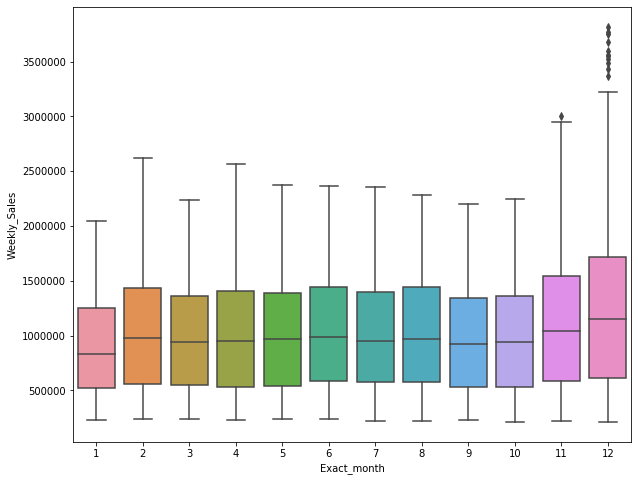

In [1859]:
plt.figure(figsize=[10,8])
sns.boxplot('Exact_month','Weekly_Sales', data = data)

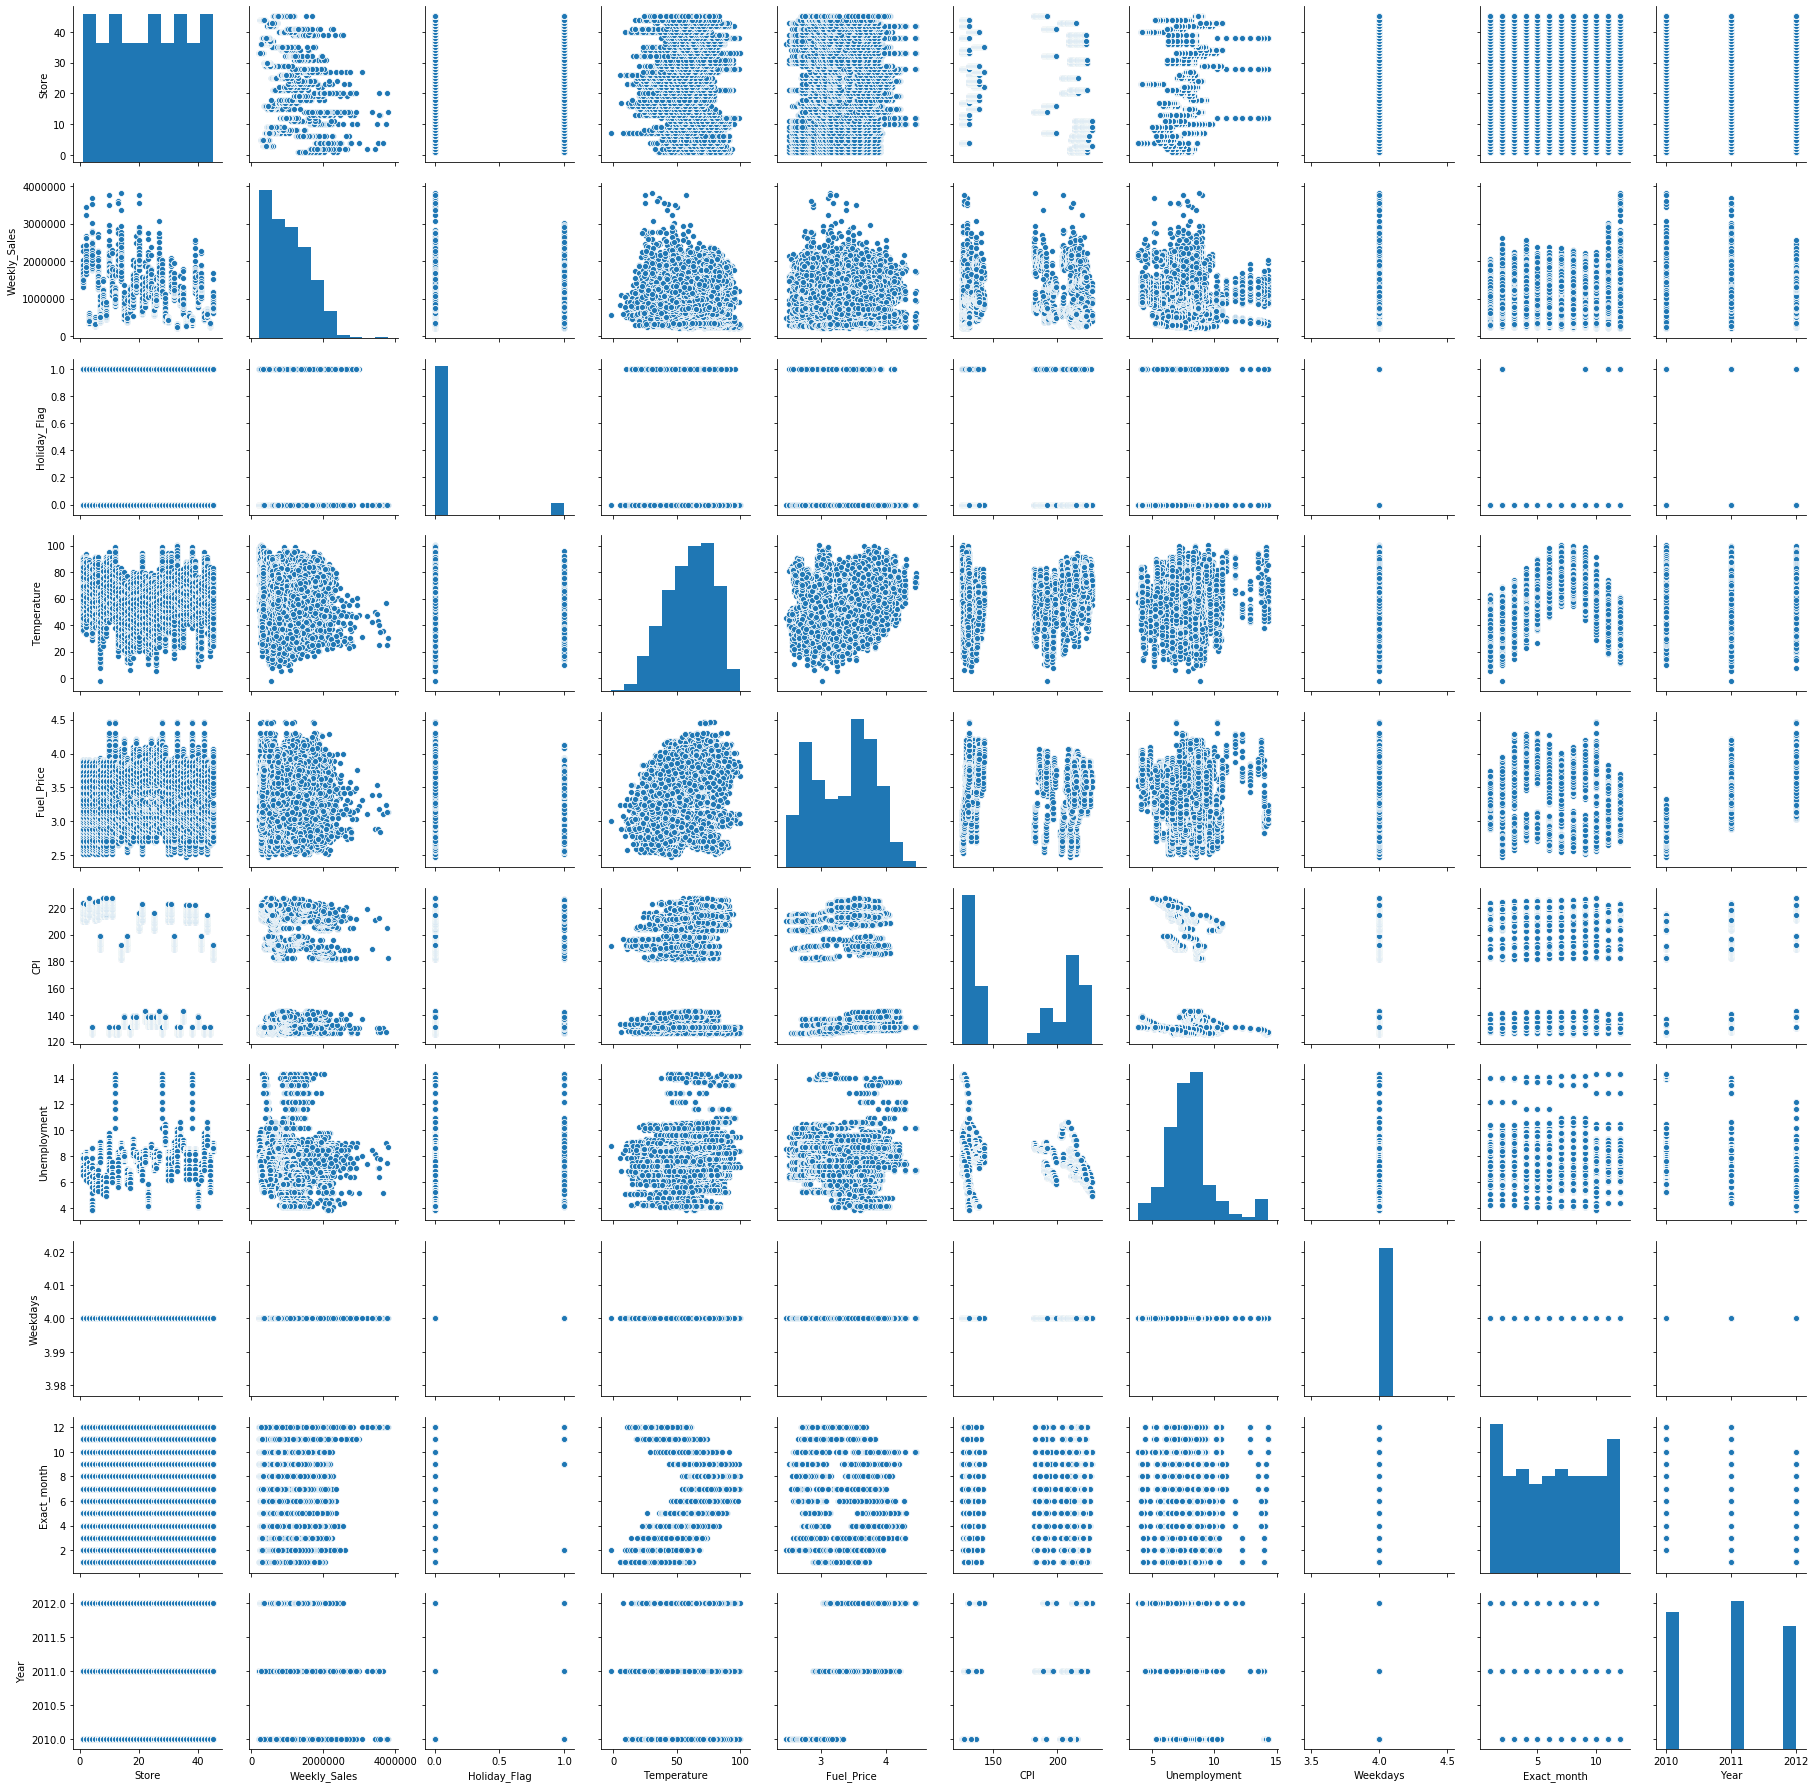

In [1860]:
sns.pairplot(data)

In [ ]:
columnTransformer = ColumnTransformer([('encoder',
                                       OneHotEncoder(),
                                       [])])